# 텍스트 파일에서 ',' 를 기준으로 단어를 분류하여 빈도수 구하기

In [1]:
import pandas as pd

filename = 'C:/Users/DFINE13/OneDrive/바탕 화면/test.txt' # 작업할 파일이 저장된 경로
fr = open(filename, 'r', encoding='utf-8')
txt = fr.read()
fr.close()

splitTxt = txt.split(',') # ','기준으로 문자열 나누기(공백 미제거)
splitTxtExBlank = txt.replace(' ','').split(',') # ','기준으로 문자열 나누기(공백 제거)

dictTxt = {}
dictTxtExBlank = {}

for st in splitTxt :
    if st == '' : 
        continue
    if st in dictTxt :
        dictTxt[st]+=1
    else :
        dictTxt[st]=1
        
for st in splitTxtExBlank :
    if st == '' : 
        continue
    if st in dictTxtExBlank :
        dictTxtExBlank[st]+=1
    else :
        dictTxtExBlank[st]=1

# ( sorted : 내림차순 정리 ) => ( dict : 튜플->딕셔너리)
# 내림차순으로 정리할시 딕셔너리가 튜플로 바뀜
dictTxt = dict((a,b) for a,b in sorted(dictTxt.items(), reverse=True, key=lambda item:item[1]))
dictTxtExBlank = dict((a,b) for a,b in sorted(dictTxtExBlank.items(), reverse=True, key=lambda item:item[1]))

# dictionary 를 dataframe 구조로 바꿈
pdTxt = pd.DataFrame(list(dictTxt.items()), columns=['단어','빈도수'])
pdTxtExBlank = pd.DataFrame(list(dictTxtExBlank.items()), columns=['단어','빈도수'])

# 현재 작업중인 파이썬 파일이 속한 폴더에 해당 파일 이름으로 저장
pdTxt.to_csv('CSVTxt.csv',header=False,index=False,encoding='utf-8-sig')
pdTxtExBlank.to_csv('CSVTxtExBlank.csv',header=False,index=False,encoding='utf-8-sig')

# 단어와 빈도수를 통해 word cloud 생성 및 출력

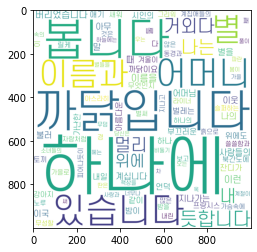

In [2]:
import sys
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.image as img

# wordcloud 폰트, 크기 등을 설정
wc = WordCloud(font_path='SCDream3.otf',
               background_color="white",
               width=1000,
               height=1000,
               max_words=100,
               max_font_size=300)

# 생성한 dict 기반으로 word cloud 생성 및 출력
wc.generate_from_frequencies(dict((a,b) for a,b in sorted(dictTxt.items(), reverse=True, key=lambda item:item[1])))
wc.to_file('wordcloud_txt.png')

image = img.imread('wordcloud_txt.png')
plt.imshow(image)
plt.show()

# 형태소 분석

In [13]:
from konlpy.tag import Okt
from collections import Counter

filepath = 'C:/Users/DFINE13/OneDrive/바탕 화면/한글 더미파일.txt'
f = open(filepath, 'r', encoding='utf-8')
txtDummy = f.read()
f.close()

okt = Okt()

print('\n====================\nnouns : 명사만 추출\n')
# 텍스트에서 명사만 추출
noun = okt.nouns(txtDummy)
countN = Counter(noun)
noun_list = countN.most_common(10)
for v in noun_list :
    print(v)

print('\n====================\nmorphs : 형태소\n')
# 형태소 단위로 나눔 ( 의미를 가지는 최소 단위 )
# 파라미터의 norm은 문장을 정규화, stem은 각 단어에서 어간을 추출한다.
morph = okt.morphs(txtDummy) # 파라미터 사용 방법 : morphs(txtDummy, '사용할 파라미터'=True)
countM = Counter(morph)
morph_list = countM.most_common(10)
for v in morph_list :
    print(v)

print('\n====================\nphrases : 형태소\n')
# 형태소 단위, 텍스트에서 어절을 추출
phrase = okt.phrases(txtDummy)
countP = Counter(phrase)
phrase_list = countP.most_common(10)
for v in phrase_list :
    print(v)
    
print('\n====================\npos : 형태소\n')
'''
형태소 단위, 각 품사를 태깅하는 함수, 주어진 텍스트를 형태소 단위로 나눈 후 나뉘어진 형태소를 해당하는 품사와 
함께 리스트화한다. 파라미터에는 norm, stem, join(나눠진 형태소와 품사를 형태소/품사 형태로 리스트화)가 있다.
'''
pos = okt.pos(txtDummy, norm=True)
countP2 = Counter(pos)
pos_list = countP2.most_common(10)
for v in pos_list :
    print(v)

'''
아래와 같은 방법으로 필요한 부분만 추출할 수 있다
종류 : Noun(명사) / Verb(동사) / Adjective(형용사) / Determiner(관형사) / Adverb(부사) / Conjunction(접속사) / 
       Exclamation(감탄사) / Josa(조사) / PreEomi(선어말어미) / Eomi(어미) / Suffix(접미사) /
       Punctuation(구두점) / Foreign(외국어, 한자 및 기타기호) / Alpha(알파벳) / Number(숫자) /
       Unknown(미등록어) / KoreanParticle(ex. ㅋㅋ) / Hashtag(트위터 해쉬태그 : #히히) / 
       ScreenName(트위터 아이디 : @example) / Email(이메일 주소) / URL(웹주소)
       https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0
'''
# 예시
print('\n====================\npos : 원하는 종류 추출 예\n')
for i in pos_list :
    if i[0][1] == 'Josa' :
        print(i)


nouns : 명사만 추출

('별', 34)
('하나', 26)
('이름', 24)
('까닭', 23)
('나', 22)
('듯', 13)
('어머님', 10)
('어머니', 10)
('무성', 10)
('언덕', 9)

morphs : 형태소

('.', 82)
(',', 51)
('별', 34)
('에', 31)
('하나', 26)
('이', 24)
('는', 24)
('이름', 24)
('의', 23)
('까닭', 23)

phrases : 형태소

('별빛', 1)
('어머님', 1)
('벌써', 1)
('벌써 나', 1)
('벌써 나의 이름', 1)
('이네들', 1)
('마디씩', 1)
('마디씩 멀리', 1)
('마디씩 멀리 나', 1)
('이제', 1)

pos : 형태소

(('.', 'Punctuation'), 82)
((',', 'Punctuation'), 51)
(('별', 'Noun'), 34)
(('에', 'Josa'), 31)
(('하나', 'Noun'), 26)
(('는', 'Josa'), 24)
(('이름', 'Noun'), 24)
(('의', 'Josa'), 23)
(('까닭', 'Noun'), 23)
(('나', 'Noun'), 22)

pos : 원하는 종류 추출 예

(('에', 'Josa'), 31)
(('는', 'Josa'), 24)
(('의', 'Josa'), 23)


# Customized Konlpy

In [69]:
from ckonlpy.tag import Twitter
from ckonlpy.tag import Postprocessor

twitter = Twitter()

print('origin konlpy\n') # 비교를 위한 origin konlpy
print(twitter.pos(testStr))

twitter.add_dictionary(['안녕이라고','말해볼까'],'Noun') # 해당 리스트 요소들을 Noun으로 재정의?
testStr = '내가 맘대로 안녕이라고 말해볼까?'
print('\n\ncustomized konlpy\n')
print(twitter.pos(testStr))

# 해당 단어 필터 등등의 custom konlpy
testCustom = '필터단어 필터 단어 커스텀이 될까요?'
postprocessor = Postprocessor(
    base_tagger = twitter,
    stopwords = {'필터'},      # 해당 단어 필터 : {'A'}
    #passwords = {'단어'},     # 해당 단어만 선택 {}
    passtags = {'Noun'},       # 해당 훔사만 선택 {'Noun'}
    replace={'요' : '요구르트', ('스텀','Noun') : '대체 완료'}, # 해당 단어 set 치환 {'A' : 'B', ('C', 'Noun') : 'D'}
    ngrams = [('필터','단어'),'Noun'] # 해당 복합 단어 set를 한 단어로 결합 [ (('A', 'B'), 'Noun'), .... ] => A - B,Noun'
)

print('\n\ncustomized konlpy2\n')
print(twitter.pos(testCustom))
print('\n')
print(postprocessor.pos(testCustom))

origin konlpy

[('내', 'Noun'), ('가', 'Josa'), ('맘대로', 'Noun'), ('안녕', 'Noun'), ('이라고', 'Josa'), ('말', 'Noun'), ('해볼까', 'Verb'), ('?', 'Punctuation')]


customized konlpy

[('내', 'Noun'), ('가', 'Josa'), ('맘대로', 'Noun'), ('안녕이라고', 'Noun'), ('말해볼까', 'Noun'), ('?', 'Punctuation')]
ngram format error : Noun


customized konlpy2

[('필터', 'Noun'), ('단어', 'Noun'), ('필터', 'Noun'), ('단어', 'Noun'), ('커', 'Verb'), ('스텀', 'Noun'), ('이', 'Josa'), ('될까', 'Verb'), ('요', 'Noun'), ('?', 'Punctuation')]


[('필터 - 단어', 'Noun'), ('필터 - 단어', 'Noun'), ('대체 완료', 'Noun'), ('요구르트', 'Noun')]


# word2vec